# <span style="color:blue"> MBA em Ciência de Dados</span>
# <span style="color:blue">Técnicas Avançadas de Captura e Tratamento de Dados</span>

## <span style="color:blue">Avaliação Final</span>
**Luis Gustavo Nonato** e **Moacir Antonelli Ponti**<br>

**Cemeai - ICMC/USP São Carlos**

A avaliação vale 10 pontos. As questões de 1 a 4, caso respondidas da forma correta, já totalizam 10 pontos.


<font color='red'>**ATENÇÃO:** Quando terminar de exame, você deve fazer um "upload" do notebook no _moodle_</font>.

### Questão 1 (2.5 pontos)
Considere o arquivo <font style="font-family: monaco"> modcovid.pdf </font> (disponível para download no moodle). Escreva um código para extrair o texto (ASCII) do arquivo PDF e escreva o texto extraído em um arquivo chamado ``modcovid.txt``.

In [1]:
from pdf2image import convert_from_path 
from PIL import Image
import pytesseract as ocr

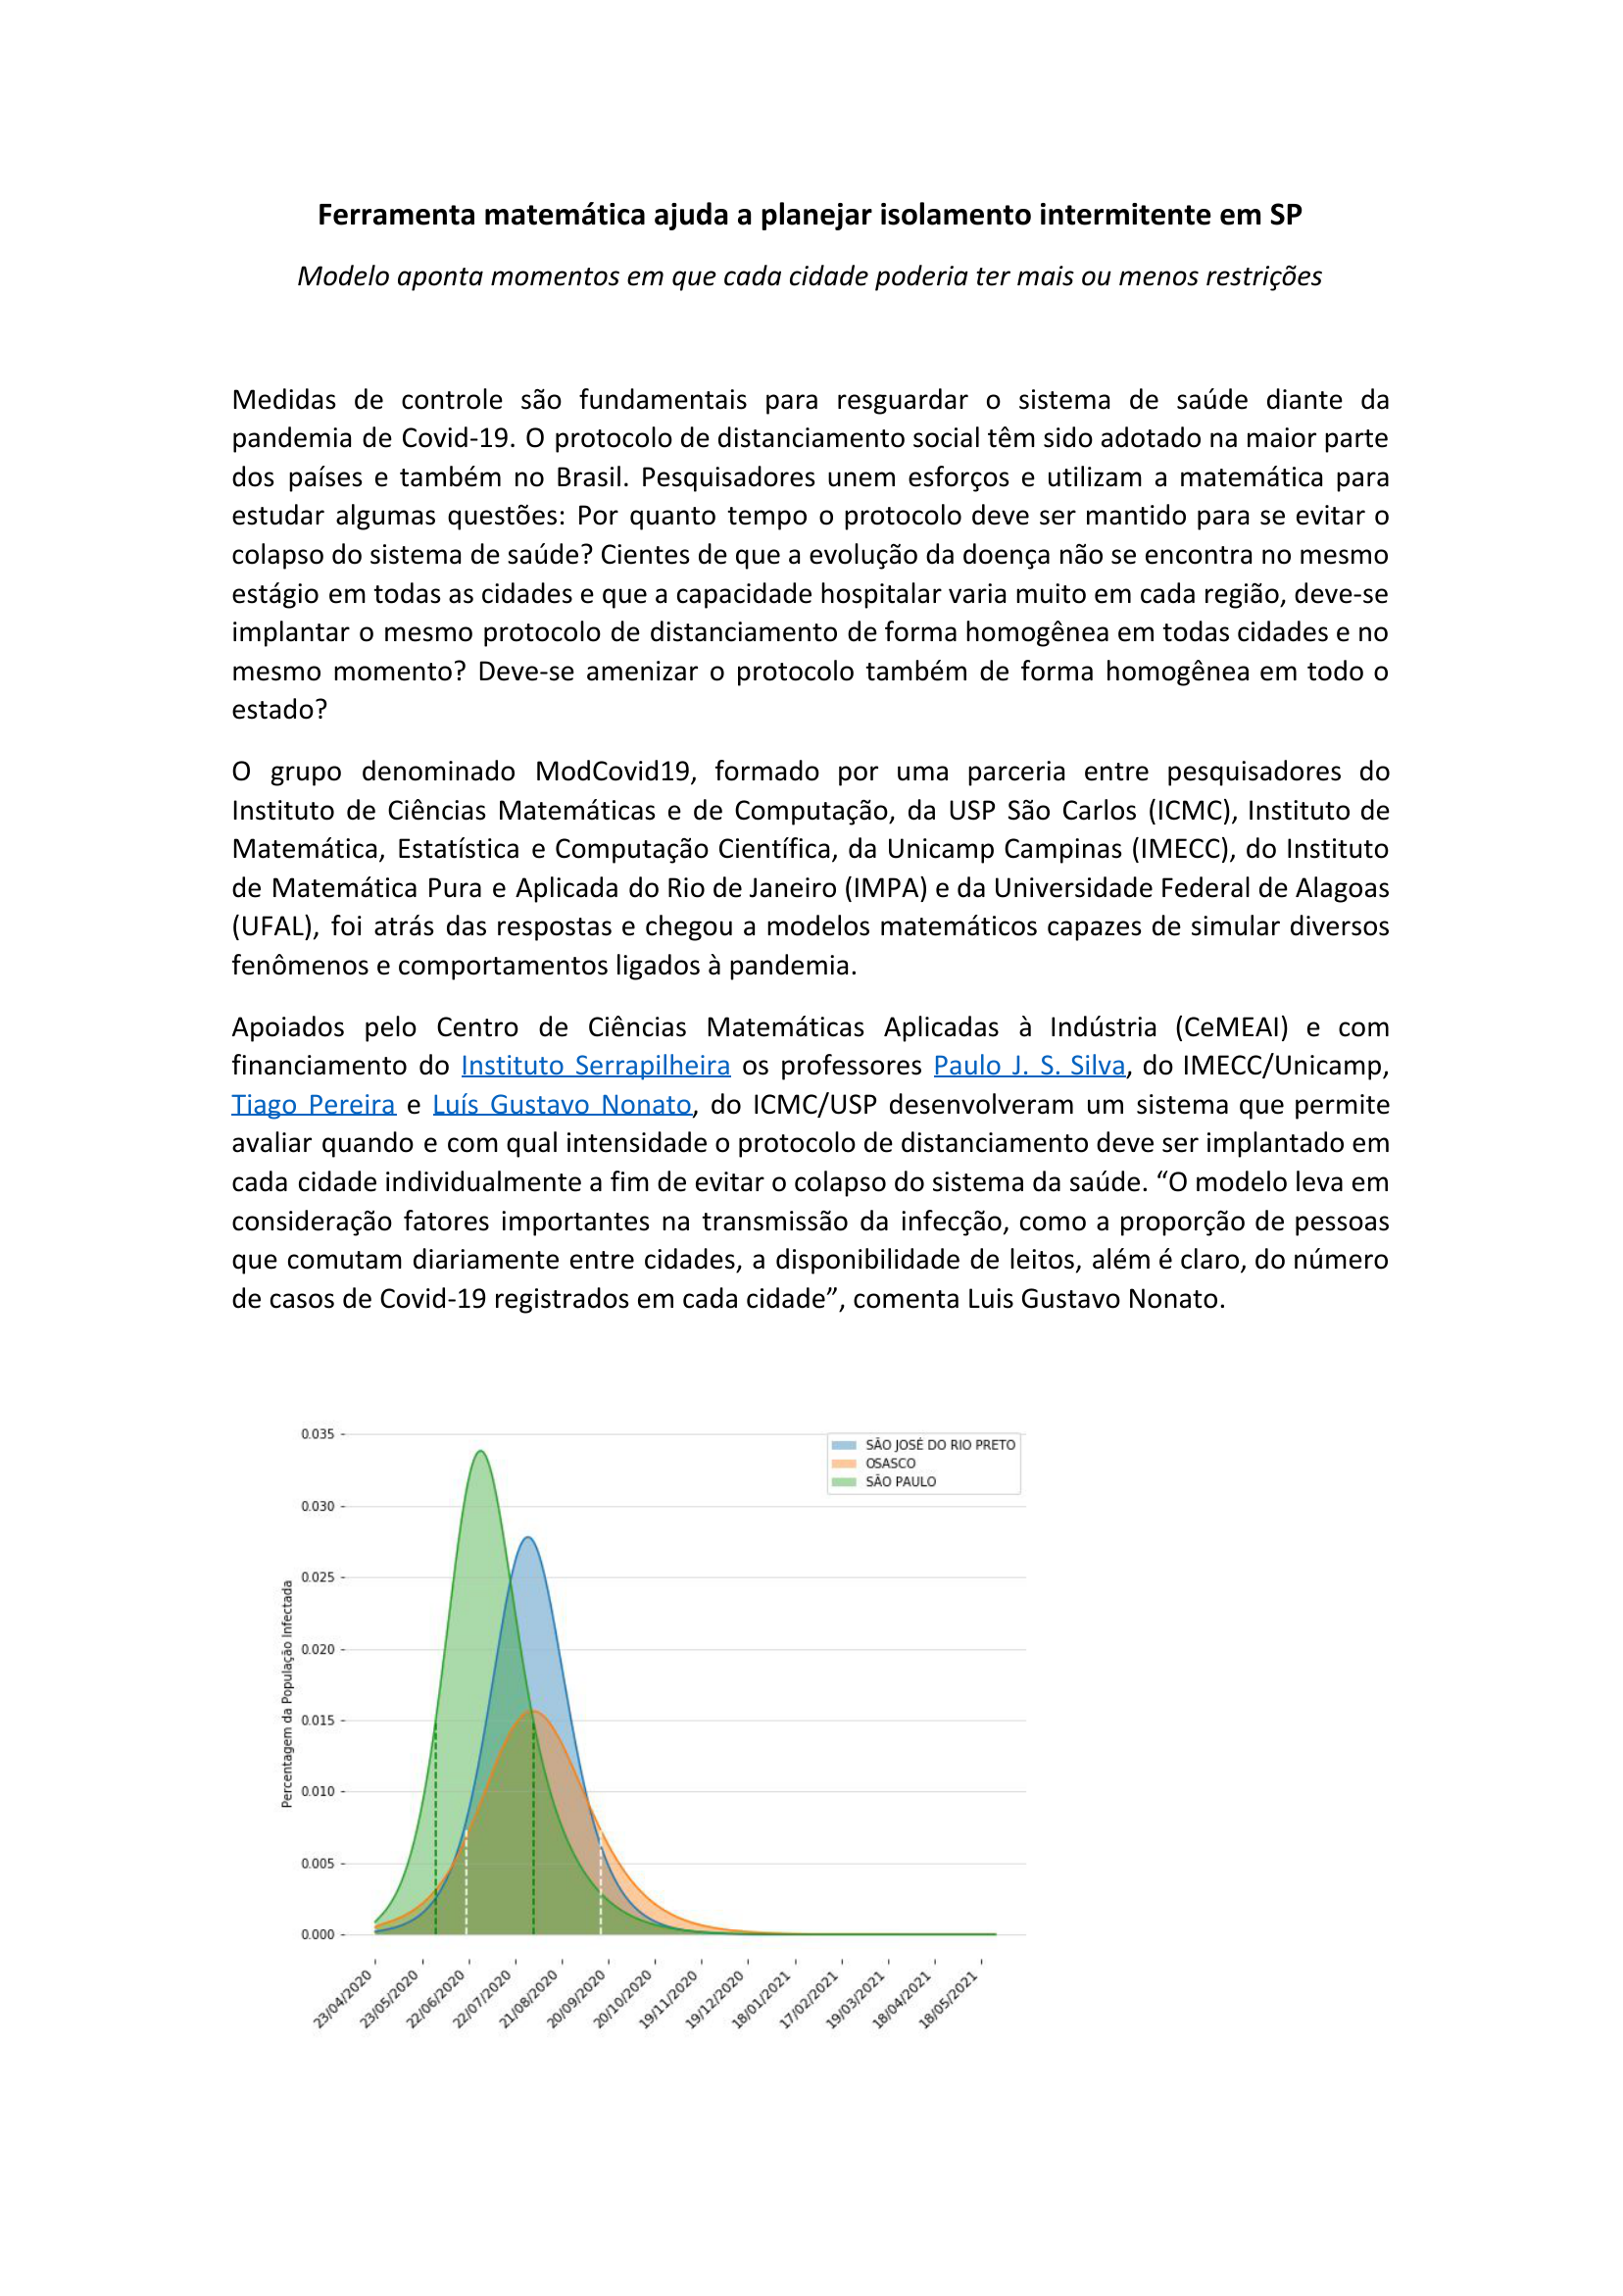

In [2]:
# Carregando o PDF e armazenando todas as páginas separadamente na variável
imagem_covid = convert_from_path('modcovid.pdf')

# Salvando o arquivo PNG
imagem_covid[0].save('modcovid.png', 'PNG')

# utilizando OCR para extrair o texto da imagem
txt_covid = ocr.image_to_string(Image.open('modcovid.png'), lang='por')

# instanciando um objeto TXT
f = open('modcovid.txt','w')

# Escrevendo o texto extraído no arquivo .txt
f.write(txt_covid)

# Fechando o arquivo
f.close()

# Exibindo a imagem
Image.open('modcovid.png')

### Questão 2 (2.5 pontos)
Leia o arquivo ``modcovid.txt`` e realize as seguinte operações:
1. Extraia todas palavras contidas no arquivo e armazene em uma lista de palavras (utilize o método <font color='blue'>word_tokenize</font> do pacote <font color='blue'>nltk</font>).
2. Remova da lista de palavras todos os "palavras" que não sejam formadas exclusivamente de caracteres do alfabeto.
3. Quantas palavras com apenas 1 caractere sobraram na lista?

In [3]:
import nltk

# Lendo o arquivo
file = open('modcovid.txt','r')
texto = file.read()
file.close()

# Extraindo todas as palavras contidas no arquivo e armazenando em uma lista de palavras
text_words = nltk.word_tokenize(texto)
print(f"Total de palavras extraídas= {len(text_words)}")

# Removendo as palavras que não sejam formadas exclusivamente de caracteres do alfabeto
text_words = [word for word in text_words if word.isalpha()]
print(f"Total de palavras formadas por caracteres do alfabeto= {len(text_words)}")

# Contando as palavras com apenas 1 caractere
text_words_1 = [word for word in text_words if len(word) == 1]
print(f"Total de palavras com apenas 1 caractere= {len(text_words_1)}")

Total de palavras extraídas= 418
Total de palavras formadas por caracteres do alfabeto= 358
Total de palavras com apenas 1 caractere= 50


---
### Questão 3 (2.5 pontos)

Carregue o arquivo `artists_mba21.csv` e armazene em um pandas DataFrame.

Esse arquivo possui os atributos:
 * name: nome do artista
 * years: anos de nascimento e morte
 * genre: gênero(s) a que pertencem suas obras
 * nationality: nacionalidades
 * bio: biografia
 * wikipedia: link para a Wikipedia do artista
 * paintings: número de obras (pinturas)

O eixo horizontal deve conter os gêneros, e o vertical suas respectivas frequências na base de dados.

In [4]:
import pandas as pd

# carregando dados
data = pd.read_csv("artists_mba21.csv")
print(data.shape)
data.sample(5)

(53, 7)


,name,years,genre,nationality,bio,wikipedia,paintings
42,Paul Klee,1879 – 1940,"Expressionism,Abstractionism,Surrealism","German,Swiss",Paul Klee (German: [paʊ̯l ˈkleː]; 18 December ...,https://en.wikipedia.org/wiki/Paul_Klee,188
20,Alfred Sisley,1839 - 1899,Impressionism,"French,British",Alfred Sisley (; French: [sislɛ]; 30 October 1...,http://en.wikipedia.org/wiki/Alfred_Sisley,259
47,Raphael,1483 – 1520,High Renaissance,Italian,Raffaello Sanzio da Urbino (Italian: [raffaˈɛl...,https://en.wikipedia.org/wiki/Raphael,109
12,Mikhail Vrubel,1856 - 1910,Symbolism,Russian,Mikhail Aleksandrovich Vrubel (Russian: Михаи́...,http://en.wikipedia.org/wiki/Mikhail_Vrubel,171
21,Pieter Bruegel,1525 - 1569,Northern Renaissance,Flemish,Pieter Bruegel (also Brueghel) the Elder (Dutc...,http://en.wikipedia.org/wiki/Pieter_Bruegel_th...,134


#### 3.a (1.5 pontos)

Exiba um histograma contendo a frequência dos diferentes gêneros dos artistas. Note que um artista pode ter mais do que um gênero associado.

Dica: use a função `str.split(',')` para separar múltiplos gêneros

In [5]:
# Criando uma lista para computar a frequência dos gêneros
genre_freq = []
for genre in data['genre'].str.split(','):
    for i in range(len(genre)):
            genre_freq.append(genre[i])
            
print(f"Número de linhas: {sum(data['genre'].value_counts())}")
print(f"Número total de gêneros: {len(genre_freq)}")
pd.Series(genre_freq).value_counts()

Número de linhas: 53
Número total de gêneros: 66


Impressionism             8
Post-Impressionism        7
Surrealism                5
Baroque                   5
Northern Renaissance      4
Expressionism             4
Symbolism                 4
High Renaissance          4
Romanticism               3
Primitivism               3
Realism                   2
Abstractionism            2
Mannerism                 2
Art Nouveau               1
Abstract Expressionism    1
Neoplasticism             1
Early Renaissance         1
Byzantine Art             1
Cubism                    1
Muralism                  1
Romanesque                1
Proto Renaissance         1
Suprematism               1
Pop Art                   1
Social Realism            1
Neorealism                1
dtype: int64

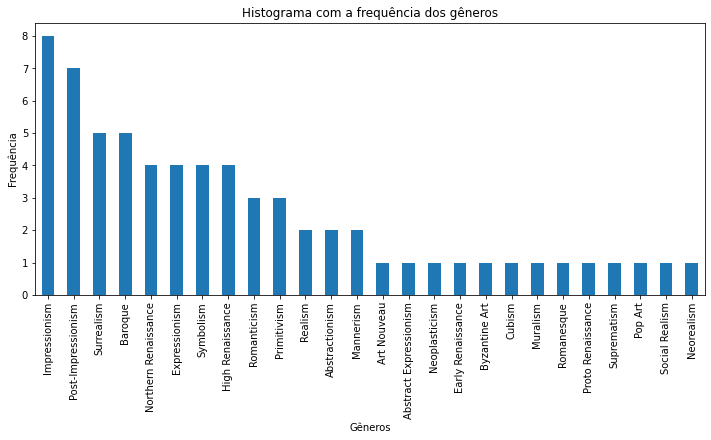

In [6]:
import matplotlib.pyplot as plt
# Gráfico com a frequência dos gêneros
fig = plt.figure(figsize = (12,5))
plt.title('Histograma com a frequência dos gêneros')
plt.ylabel('Frequência')
plt.xlabel('Gêneros')
pd.Series(genre_freq).value_counts().plot(kind='bar');

#### 3.b (1.0 ponto)

Trate a coluna "paintings", a qual deveria conter apenas atributos numéricos inteiros. Siga os seguintes passos:
1. Exiba os valores não convertíveis para númerico
2. Converta a coluna para o tipo inteiro de forma que não haja dados perdidos/faltantes

Após o tratamento exiba a estatística descritiva da coluna tratada usando `describe()`

Dica: há várias soluções possíveis, mas usar expressões regulares pode ser útil nesse caso. Por exemplo a expressão `'(\d+)'` extrai apenas dígitos

In [7]:
import re
        
print(data['paintings'].name, "dtype antes do tratamento:", data['paintings'].dtype.name)
print("\n", len(data['paintings']), "valores antes do tratamento: ", end="")
print(data['paintings'].values)

# encontrando os valores que não são dígitos de números
not_a_number = []
for i in range(len(data['paintings'])):
    if (re.findall('[^\d]', data['paintings'][i])):
        not_a_number.append(data['paintings'][i])
print("\n", len(not_a_number), "valores não convertíveis para numérico", not_a_number)      

# tratando os dados e convertendo para números inteiros
for i in not_a_number:
    if i=='three':
        data.loc[data['paintings']==i, 'paintings'] = '3'
    else:
        valor_corrigido = re.findall('[0-9]+', i)
        data.loc[data['paintings']==i, 'paintings'] = valor_corrigido
data['paintings'] = data['paintings'].astype(int)
print("\n", data['paintings'].name, "dtype após o tratamento:", data['paintings'].dtype.name)
print("\n", len(data['paintings']), "valores após o tratamento: ", end="")
print(data['paintings'].values)

# estatística descritiva
print("\nEstatística descritiva após o tratamento:\n", data['paintings'].describe())


paintings dtype antes do tratamento: object

 53 valores antes do tratamento: ['193' '88' '70)' '73' '194' '139' '90' '99' '877' '"117"' '137' '126'
 '171' '439' '141' '336' '291' '120' '87' '328' '259' '134' '239' '119'
 '164' '55' '143' '128' '186' '81' '702' '262' '255' '81' '59' '91' '66'
 '67' '47' '31' '70' '43' '188' "'84'" '102' '181' '311' '109' '49' '24'
 'three' "'25'" '29']

 5 valores não convertíveis para numérico ['70)', '"117"', "'84'", 'three', "'25'"]

 paintings dtype após o tratamento: int32

 53 valores após o tratamento: [193  88  70  73 194 139  90  99 877 117 137 126 171 439 141 336 291 120
  87 328 259 134 239 119 164  55 143 128 186  81 702 262 255  81  59  91
  66  67  47  31  70  43 188  84 102 181 311 109  49  24   3  25  29]

Estatística descritiva após o tratamento:
 count     53.000000
mean     160.433962
std      156.816589
min        3.000000
25%       70.000000
50%      119.000000
75%      188.000000
max      877.000000
Name: paintings, dtype: float64

### Questão 4 (2.5 pontos)

Dada uma imagem `query.jpg` de uma pintura da qual não sabemos o artista, gostaríamos de fazer uma busca numa base de dados e recuperar obras similares de acordo com suas cores. Para isso utilizaremos um descritor baseado em cores conhecido por **Border-Interior Classification (BIC)**

> Stehling, R. O., Nascimento, M. A., & Falcão, A. X. (2002). A compact and efficient image retrieval approach based on border/interior pixel classification. In Proceedings of the eleventh international conference on Information and knowledge management (pp. 102-109). 

O BIC funciona da seguinte forma:

1. Transforma a imagem em um único canal de cores
2. Reescala o número de cores da imagem para $C$ cores
3. Computa dois histogramas de cor na imagem:
   1. Para os pixels considerados "interior", cuja cor seja igual à dos 4 vizinhos (cima, baixo, direita e esquerda)
   2. Para todos os pixels da imagem, considerados de "borda". Aqui também entram os pixels na extremidade da imagem (ou seja as primeiras e últimas linhas/colunas)
4. Normaliza cada histograma, concatena os histogramas em um único vetor e normaliza novamente o vetor concatenado
   
Exemplo seja a matriz abaixo uma imagem com $C=4$, ou seja, com cores 0, 1, 2 e 3:

|||||||
|-|-|-|-|-|-|
|3|3|3|2|2|0|
|3|**3**|3|2|**2**|2|
|3|**3**|3|2|**2**|2|
|3|**3**|**3**|3|2|2|
|0|3|3|1|2|0|

Os valores em negrito correspondem à cores "interior" e o restante de "borda". 

Assim, teríamos o seguintes histogramas:<br>
`h_borda = [3,1,9,11]`<br>
`h_inter = [0,0,2,4]`

Note que cada vetor representa as frequências, em ordem, das cores 0, 1, 2 e 3. Por exemplo, há 3 pixels da cor 0 referentes à borda, há 2 pixels da cor 2 referentes a interior.

Após computar os histogramas, é preciso normalizá-los para evitar problemas com imagens de diferentes resoluções. Diferentes métodos podem ser utilizados. Aqui utilizaremos a *normalização L1*, dividindo os elementos pela soma absoluta do vetor, resultando em:<br>
`h_borda_nr = [0.125,  0.0417, 0.375, 0.4583]`<br>
`h_inter_nr = [0.000,  0.0000, 0.333, 0.6667]`<br>

Assim, para uma determinada imagem com $C$ cores, o vetor de características terá $2\cdot C$ dimensões, relativas aos 2 histogramas concatenados. Após a concatenação normalizamos novamente:<br>
`bic_norm = [0.0625, 0.0208, 0.1875, 0.2292, 0.0000, 0.0000, 0.1667, 0.3333]`

Esse será o vetor de características final a ser utilizado

---
Use o descritor BIC com $C=32$ para as imagens disponibilizadas. Use a função disponibilizada `rescale_image_colors()` para reescalar a imagem.

Faça uma busca no diretório `paintings21`, retornando as 5 imagens mais similares a `query.jpg` de acordo com o descritor BIC e a distância Euclidiana. Exiba a imagem de consulta, e também as 5 imagens retornadas, com seus nomes e valores da distância obtidos.

In [8]:
# bibliotecas e funções 
from skimage import feature
from os import listdir
import imageio
import matplotlib.pyplot as plt
import numpy as np

def rescale_image_colors(img, n_colors=32):
    # RGB para escala de cinza usando Luma Rec.709
    img = np.array(img, dtype=np.float64, copy=False)
    if (len(img.shape) > 2):
        img = img[:,:,0]*0.2126 + img[:,:,1]*0.7152 + img[:,:,2]*0.0772
    # reescalando numero de cores
    img = img/255.0
    img = (img*(n_colors-1)).astype(np.uint8)
    return img

def euclidean_distance(ArrA, ArrB):
    """Função para o cálculo da distância euclidiana entre 2 vetores"""
    return np.sqrt(np.sum((ArrA - ArrB)**2))

In [9]:
# código relativo ao descritor BIC e para extração de características das imagens
def BIC(img, n_colors = 32, vetor_escalonado = False):
    """Função para calcular o descritor baseado em cores Border-Interior Classification (BIC)
    Entradas:
    img: Vetor da imagem a ser analisada
    n_colors: Número de cores da imagem
    vetor_escalonado: Booleano indicando se o vetor de entrada já está ou não reescalonado
    Saída:
    vetor com o descritor BIC
    """
    if (vetor_escalonado):
        imagem_IO = np.array(img)
    else:
        imagem_IO = rescale_image_colors(img, n_colors)

    h_borda = [0] * n_colors
    h_inter = [0] * n_colors
    
    for rowidx, row in enumerate(imagem_IO):
        for colidx, col in enumerate(row):
            h_borda[col] += 1

            if ((rowidx > 0 and rowidx < imagem_IO.shape[0]-1) and (colidx > 0 and colidx < imagem_IO.shape[1]-1)):
                above   = imagem_IO[rowidx -1, colidx]
                below   = imagem_IO[rowidx +1, colidx]
                left    = imagem_IO[rowidx, colidx -1]
                right   = imagem_IO[rowidx, colidx +1]
                if ((col == above) and (col == below) and (col == left) and (col == right)):
                    h_inter[col] += 1
                    h_borda[col] -= 1

    # Normaliza as listas com a norma L1 e cria o vetor final
    h_borda_nr = [0] * n_colors
    h_inter_nr = [0] * n_colors
    bic_norm = [0] * 2 * n_colors
       
    for i in range(len(h_borda)):
        h_borda_nr[i] = h_borda[i]/sum(h_borda)
    
    for i in range(len(h_inter)):
        h_inter_nr[i] = h_inter[i]/sum(h_inter)

    bic_norm = h_borda_nr + h_inter_nr
    bic_norm_sum = sum(bic_norm)    
    
    for i in range(len(bic_norm)):
        bic_norm[i] = bic_norm[i]/bic_norm_sum
    return np.array(bic_norm)

In [10]:
# testando com o vetor do enunciado
vetor_teste = [[3,3,3,2,2,0],
              [3,3,3,2,2,2],
              [3,3,3,2,2,2],
              [3,3,3,3,2,2],
              [0,3,3,1,2,0]]

print(f"BIC do vetor_teste: {(BIC(vetor_teste, 4, True)).round(4)}")

BIC do vetor_teste: [0.0625 0.0208 0.1875 0.2292 0.     0.     0.1667 0.3333]


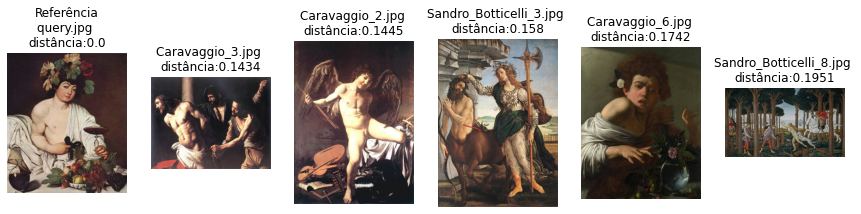

In [11]:
# Exibindo a a imagem de consulta e as 5 imagens mais próximas, com seus nomes e valores da distância euclidiana
# query
imgQ = imageio.imread("paintings21/query.jpg")

l_imgs = listdir('./paintings21/')
n_imgs = len(l_imgs)

# Cálculo do BIC para a imagem de referência query.jpg
BIC_imgQ = BIC(imgQ)

# Dicionário para guardar as distâncias euclidianas em relação à imagem de referência
distances = {}
# percorre imagens
for im in l_imgs:
    imgS = imageio.imread('./paintings21/'+im)
    BIC_imgS = BIC(imgS)
    distances[im] = euclidean_distance(BIC_imgQ, BIC_imgS)
    
# imagens mais similares
menores_distancias = sorted(distances.values())[0:6]
img = [0] * len(menores_distancias)
for i in range(len(menores_distancias)):
    for k,v in distances.items():
        if v==menores_distancias[i]:
            img[i]=k
            
# plotando as imagens mais similares e as distâncias euclidianas            
img0 = imageio.imread('./paintings21/'+img[0])
img1 = imageio.imread('./paintings21/'+img[1])
img2 = imageio.imread('./paintings21/'+img[2])
img3 = imageio.imread('./paintings21/'+img[3])
img4 = imageio.imread('./paintings21/'+img[4])
img5 = imageio.imread('./paintings21/'+img[5])

plt.figure(figsize=(15,5))
plt.subplot(161); plt.imshow(img0); plt.title(f"Referência\n{img[0]} \ndistância:{menores_distancias[0].round(4)}");
plt.axis('off')
plt.subplot(162); plt.imshow(img1); plt.title(f"{img[1]} \ndistância:{menores_distancias[1].round(4)}");
plt.axis('off')
plt.subplot(163); plt.imshow(img2); plt.title(f"{img[2]} \ndistância:{menores_distancias[2].round(4)}");
plt.axis('off')
plt.subplot(164); plt.imshow(img3); plt.title(f"{img[3]} \ndistância:{menores_distancias[3].round(4)}");
plt.axis('off')
plt.subplot(165); plt.imshow(img4); plt.title(f"{img[4]} \ndistância:{menores_distancias[4].round(4)}");
plt.axis('off')
plt.subplot(166); plt.imshow(img5); plt.title(f"{img[5]} \ndistância:{menores_distancias[5].round(4)}");
plt.axis('off');
